 SpaCy Introduction for NLP | Linguistic Features Extraction

Example 1: "Apple is looking at buying U.K. startup for $1 billion"

Example 2: "Ishu ate the Apple"

Spacy Models: https://spacy.io/models/en

In [1]:
#!pip install -U spacy
#one time only

In [2]:
#!pip install -U spacy-lookups-data
#one time only

Spacy library 3 size/3 Types available
CORE MODELS
English
1)en_core_web_sm
2)en_core_web_md
3)en_core_web_lg

In [3]:
#!python -m spacy download en_core_web_sm
#One time only

#### Why Spacy is used?

Answer: Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing. 
That’s exactly what spaCy is designed to do: you put in raw text, and get back a Doc object, that comes with a variety of annotations.

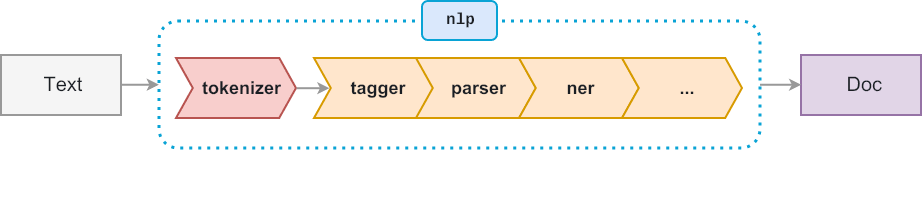

#### 1. Tokenization

Tokenization is the task of splitting a text into meaningful segments, called tokens. The input to the tokenizer is a unicode text, and the output is a Doc object. 

In [4]:
import spacy

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
doc = nlp("Apple isn't looking at buyig U.K. startup for $1 billion")

In [7]:
for token in doc:
    print(token.text)

Apple
is
n't
looking
at
buyig
U.K.
startup
for
$
1
billion


##### 2.Part-of_Speech [POS] Tagging

In [8]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

###### To know more : https://spacy.io/api/annotation#pos-tagging

In [9]:
for token in doc:
    print(token.text, token.lemma_)

Apple Apple
is be
n't not
looking look
at at
buyig buyig
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [10]:
for token in doc:
    print(f'{token.text:{15}} {token.lemma_:{15}} {token.pos_:{10}} {token.is_stop}')#getting a list of tokens,Lemmatized part,POS,stopword or not

Apple           Apple           PROPN      False
is              be              AUX        True
n't             not             PART       True
looking         look            VERB       False
at              at              ADP        True
buyig           buyig           NOUN       False
U.K.            U.K.            PROPN      False
startup         startup         NOUN       False
for             for             ADP        True
$               $               SYM        False
1               1               NUM        False
billion         billion         NUM        False


##### 3.Dependency Parsing: How one word is dependent on other word(How one token is dependent on other token)

In [11]:
for chunk in doc.noun_chunks:
    print(f'{chunk.text:{30}} {chunk.root.text:{15}} {chunk.root.dep_}')

Apple                          Apple           nsubj
buyig U.K. startup             startup         pobj


##### 4. Named Entity Recognition 

In [12]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

In [16]:
doc.ents

(Apple, U.K., $1 billion)

In [14]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


##### 5. Sentence Segmentation : Generates sentences

In [17]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

In [18]:
#doc.sents

In [19]:
for sent in doc.sents:
    print(sent)

Apple isn't looking at buyig U.K. startup for $1 billion


In [20]:
doc1 = nlp("Welcome to KGP Talkie. Thanks for watching. Please like and subscribe")

In [21]:
for sent in doc1.sents:
    print(sent)

Welcome to KGP Talkie.
Thanks for watching.
Please like and subscribe


In [24]:
doc2 = nlp("Welcome to.*.KGP Talkie.*.Thanks for watching")

In [25]:
for sent in doc2.sents:
    print(sent)

Welcome to.*.KGP
Talkie.*.Thanks for watching


##### Lets create your own parser

In [57]:
def set_rule(doc):
    for token in doc[:-1]: #from first to last row
        if token.text == '...':#condition where parsing is necessary
            doc[token.i + 1].is_sent_start = True #Where start of end
    return doc

In [56]:
nlp.remove_pipe('set_rule')
#You need toremove pipe afer modification/usage

('set_rule', <function __main__.set_rule(doc)>)

In [58]:
nlp.add_pipe(set_rule, before = 'parser')#You need to add pipe to use your created parser

In [59]:
text = 'Welcome to KGP Talkie...Thanks...Like and Subscribe!'
doc = nlp(text) #adding pipe

In [60]:
for sent in doc.sents:
    print(sent)

Welcome to KGP Talkie...
Thanks...
Like and Subscribe!


In [61]:
for token in doc:
    print(token.text)

Welcome
to
KGP
Talkie
...
Thanks
...
Like
and
Subscribe
!


### Visualization 

In [62]:
from spacy import displacy#to dispaly the graphs nof relation and more between the  words

###### 1

In [63]:
doc

Welcome to KGP Talkie...Thanks...Like and Subscribe!

In [64]:
displacy.render(doc, style='dep')

###### 2

In [65]:
displacy.render(doc, style='dep', options={'compact':True, 'distance': 100})

###### 3

In [68]:
doc3 = nlp("Apple isn't looking at buyig U.K. startup for $1 billion")

In [69]:
displacy.render(doc3, style='ent')

###### 4

In [73]:
doc4=nlp("Bholu is a very bad boy")

In [74]:
displacy.render(doc4, style='dep')